In [1]:
import numpy as np
import cv2
from scipy.spatial.distance import squareform, pdist, cdist
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

In [2]:
def plot_matches(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1.astype(np.float32)
    image2.astype(np.float32)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]), '-', color=color)

####Edge detection

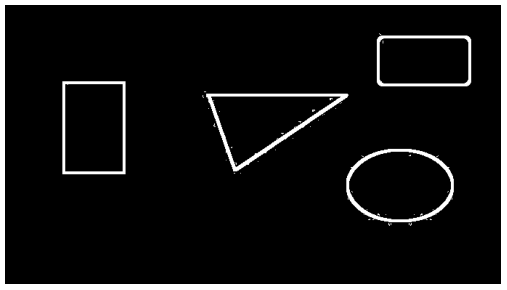

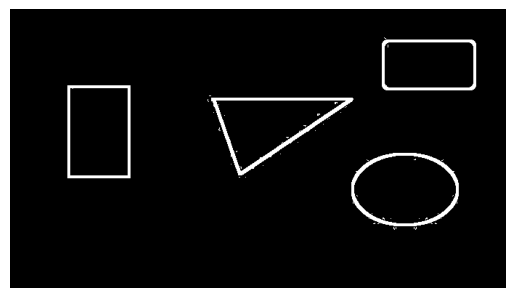

In [3]:
# TODO: implement this function
# input: im is an RGB image with shape [height, width, 3]
# output: edge_mask with shape [height, width] with valuse 0 and 1, where 1s indicate edge pixels of the input image
# You can use opencv functions and numpy functions
def edge_detection(im, threshold=5):
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # step 0: convert RGB to gray-scale image
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)


    # step 1: compute image gradient using Sobel filters with kernel size 5
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
    xSobel = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=5)
    ySobel = cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=5)

    # step 2: compute gradient magnitude at every pixels
    grad_magnitude = np.sqrt((xSobel**2)+(ySobel**2))


    # step 3: threshold the gradient magnitude to obtain edge mask
    # use threshold
    edge_mask =  (grad_magnitude > threshold).astype(np.uint8)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ### END YOUR CODE

    return edge_mask

im_bw = cv2.imread('bw.jpg')
edge_mask = edge_detection(im_bw, 100)

plt.imshow(edge_mask, cmap='gray')
plt.axis('off')
plt.show()